In [1]:
library(dplyr)
library(tidyr)
library(readr) 
library(caret)
library(ggplot2)
library(GGally)
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(modelr)
library(car)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: lattice

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘modelr’


The following object is masked fr

## **(1) Introduction**

## **(2) Methods and Results**

### **2.a) Exploratory Data Analysis (EDA)**

#### First we load the dataset.

In [2]:
# Code written by Yang
heart_disease_data <- read.csv("processed.cleveland.data", header=FALSE)

head(heart_disease_data)

V1 V2 V3 V4  V5  V6 V7 V8  V9 V10 V11 V12 V13 V14
1 63 1  1  145 233 1  2  150 0  2.3 3   0.0 6.0 0  
2 67 1  4  160 286 0  2  108 1  1.5 2   3.0 3.0 2  
3 67 1  4  120 229 0  2  129 1  2.6 2   2.0 7.0 1  
4 37 1  3  130 250 0  0  187 0  3.5 3   0.0 3.0 0  
5 41 0  2  130 204 0  2  172 0  1.4 1   0.0 3.0 0  
6 56 1  2  120 236 0  0  178 0  0.8 1   0.0 3.0 0

*Table 1*

In [3]:
dim(heart_disease_data)
str(heart_disease_data)

[1] 303  14

'data.frame':	303 obs. of  14 variables:
 $ V1 : num  63 67 67 37 41 56 62 57 63 53 ...
 $ V2 : num  1 1 1 1 0 1 0 0 1 1 ...
 $ V3 : num  1 4 4 3 2 2 4 4 4 4 ...
 $ V4 : num  145 160 120 130 130 120 140 120 130 140 ...
 $ V5 : num  233 286 229 250 204 236 268 354 254 203 ...
 $ V6 : num  1 0 0 0 0 0 0 0 0 1 ...
 $ V7 : num  2 2 2 0 2 0 2 0 2 2 ...
 $ V8 : num  150 108 129 187 172 178 160 163 147 155 ...
 $ V9 : num  0 1 1 0 0 0 0 1 0 1 ...
 $ V10: num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ V11: num  3 2 2 3 1 1 3 1 2 3 ...
 $ V12: chr  "0.0" "3.0" "2.0" "0.0" ...
 $ V13: chr  "6.0" "3.0" "7.0" "3.0" ...
 $ V14: int  0 2 1 0 0 0 3 0 2 1 ...


#### Cleaning and Wrangling Data

From previous part, we can see that there are a lot of categorical variables in this dataset. However, our current dataset has many of these categorical columns labeled as numerical which will cause inaccuracies with our model. To fix this, we can change these columns to categorical using `as.factor()`. Since `num` is our response variable and we need it to be binomial, we should also change the values in `num` to be No for a value of 0, and Yes for values 1-4.

In [4]:
# Code written by Yang
colnames(heart_disease_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                 "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

#Since ca and thal include the "?" level , so we remove the "?" in the dataset
heart_disease_data <- heart_disease_data %>%
  filter(ca != "?" & thal != "?")

#since the response vaiable has 4 levels, so we convert  the num variable from a multi-level categorical variable (with levels 0, 1, 2, 3, 4) into a binary variable
heart_disease_data <- heart_disease_data %>% 
    mutate(sex = as.factor(sex)) %>%
    mutate(cp = as.factor(cp)) %>%
    mutate(fbs = as.factor(fbs)) %>%
    mutate(restecg = as.factor(restecg)) %>%
    mutate(exang = as.factor(exang)) %>%
    mutate(slope = as.factor(slope)) %>%
    mutate(ca = as.factor(ca)) %>%
    mutate(thal = as.factor(thal)) %>%
    mutate(num = as.factor(if_else(num == 0, "No", "Yes")))

head(heart_disease_data)
str(heart_disease_data)

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca  thal num
1 63  1   1  145      233  1   2       150     0     2.3     3     0.0 6.0  No 
2 67  1   4  160      286  0   2       108     1     1.5     2     3.0 3.0  Yes
3 67  1   4  120      229  0   2       129     1     2.6     2     2.0 7.0  Yes
4 37  1   3  130      250  0   0       187     0     3.5     3     0.0 3.0  No 
5 41  0   2  130      204  0   2       172     0     1.4     1     0.0 3.0  No 
6 56  1   2  120      236  0   0       178     0     0.8     1     0.0 3.0  No

'data.frame':	297 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 1 1 2 2 ...
 $ cp      : Factor w/ 4 levels "1","2","3","4": 1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 2 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 3 3 3 1 3 1 3 1 3 3 ...
 $ thalach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 2 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : Factor w/ 3 levels "1","2","3": 3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : Factor w/ 4 levels "0.0","1.0","2.0",..: 1 4 3 1 1 1 3 1 2 1 ...
 $ thal    : Factor w/ 3 levels "3.0","6.0","7.0": 2 1 3 1 1 1 1 1 3 3 ...
 $ num     : Factor w/ 2 levels "No","Yes": 1 2 2 1 1 1 2 1 2 2 ...


*Table 2*

In [5]:
dim(heart_disease_data)
summary(heart_disease_data)

[1] 297  14

      age        sex     cp         trestbps          chol       fbs    
 Min.   :29.00   0: 96   1: 23   Min.   : 94.0   Min.   :126.0   0:254  
 1st Qu.:48.00   1:201   2: 49   1st Qu.:120.0   1st Qu.:211.0   1: 43  
 Median :56.00           3: 83   Median :130.0   Median :243.0          
 Mean   :54.54           4:142   Mean   :131.7   Mean   :247.4          
 3rd Qu.:61.00                   3rd Qu.:140.0   3rd Qu.:276.0          
 Max.   :77.00                   Max.   :200.0   Max.   :564.0          
 restecg    thalach      exang      oldpeak      slope     ca       thal    
 0:147   Min.   : 71.0   0:200   Min.   :0.000   1:139   0.0:174   3.0:164  
 1:  4   1st Qu.:133.0   1: 97   1st Qu.:0.000   2:137   1.0: 65   6.0: 18  
 2:146   Median :153.0           Median :0.800   3: 21   2.0: 38   7.0:115  
         Mean   :149.6           Mean   :1.056           3.0: 20            
         3rd Qu.:166.0           3rd Qu.:1.600                              
         Max.   :202.0     

*Table 3*

##### To explore the dataset and address the question of interest, we propose using corrleation matrix，heatmap histograms for numerical variables and bar plots for categorical variables. These plots will help us understand the distribution of each covariates and response variable, and their potential relationship with the presence of heart disease. we also use the `ggpairs()` which is a good plot , because it shows plots and correlation index of the association of numerical variables with the response and other covariates, it can be useful to check for collinearity.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

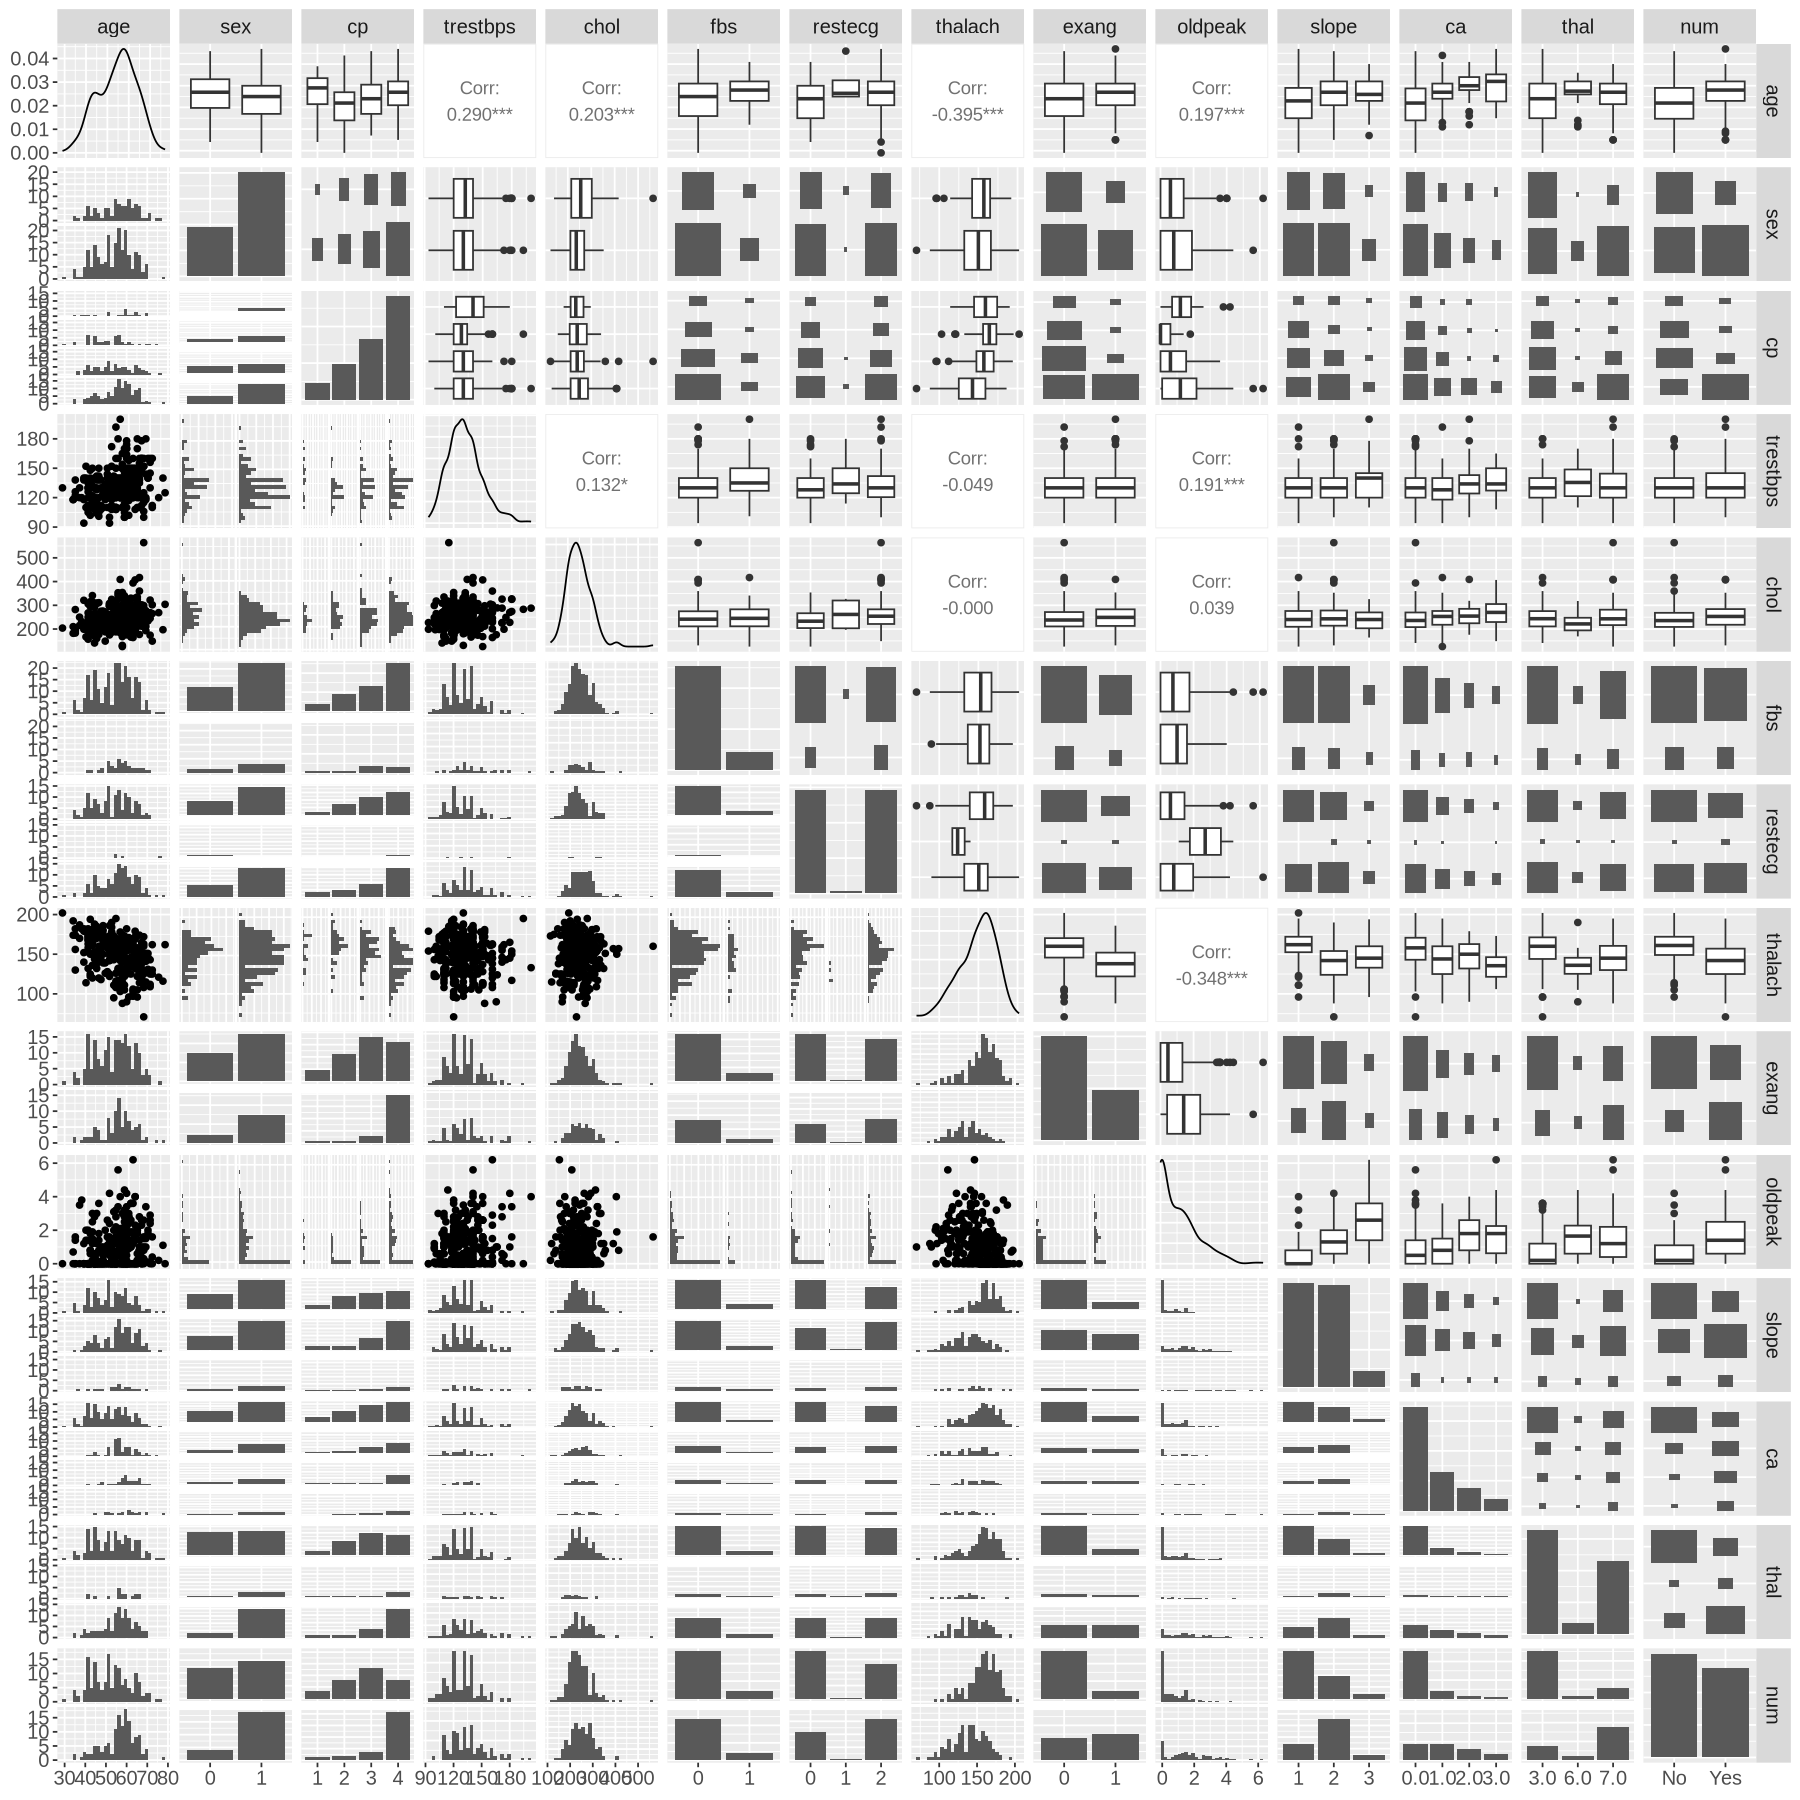

In [6]:
# Code written by Yang
options(repr.plot.width = 15, repr.plot.height = 15) 
heart_disease_pair_plots <- 
   heart_disease_data %>%
   ggpairs(progress = FALSE) +
   theme(
     text = element_text(size = 15),
     plot.title = element_text(face = "bold"),
     axis.title = element_text(face = "bold")
   )
heart_disease_pair_plots

*Figure 1*

In [7]:
# Code written by Yang
corr_matrix_heart_disease <- 
    heart_disease_data %>%
    select(age,trestbps,chol,thalach,oldpeak) %>% 
    cor() %>%
    as_tibble(rownames = 'var1') %>%
    pivot_longer(-var1, names_to = "var2", values_to = "corr")
corr_matrix_heart_disease

var1     var2     corr         
1  age      age       1.000000e+00
2  age      trestbps  2.904763e-01
3  age      chol      2.026435e-01
4  age      thalach  -3.945629e-01
5  age      oldpeak   1.971226e-01
6  trestbps age       2.904763e-01
7  trestbps trestbps  1.000000e+00
8  trestbps chol      1.315357e-01
9  trestbps thalach  -4.910766e-02
10 trestbps oldpeak   1.912431e-01
11 chol     age       2.026435e-01
12 chol     trestbps  1.315357e-01
13 chol     chol      1.000000e+00
14 chol     thalach  -7.456799e-05
15 chol     oldpeak   3.859579e-02
16 thalach  age      -3.945629e-01
17 thalach  trestbps -4.910766e-02
18 thalach  chol     -7.456799e-05
19 thalach  thalach   1.000000e+00
20 thalach  oldpeak  -3.476400e-01
21 oldpeak  age       1.971226e-01
22 oldpeak  trestbps  1.912431e-01
23 oldpeak  chol      3.859579e-02
24 oldpeak  thalach  -3.476400e-01
25 oldpeak  oldpeak   1.000000e+00

*Table 4*

##### Plot the heatmatrix to show the correlation between the numerical variables in the data set

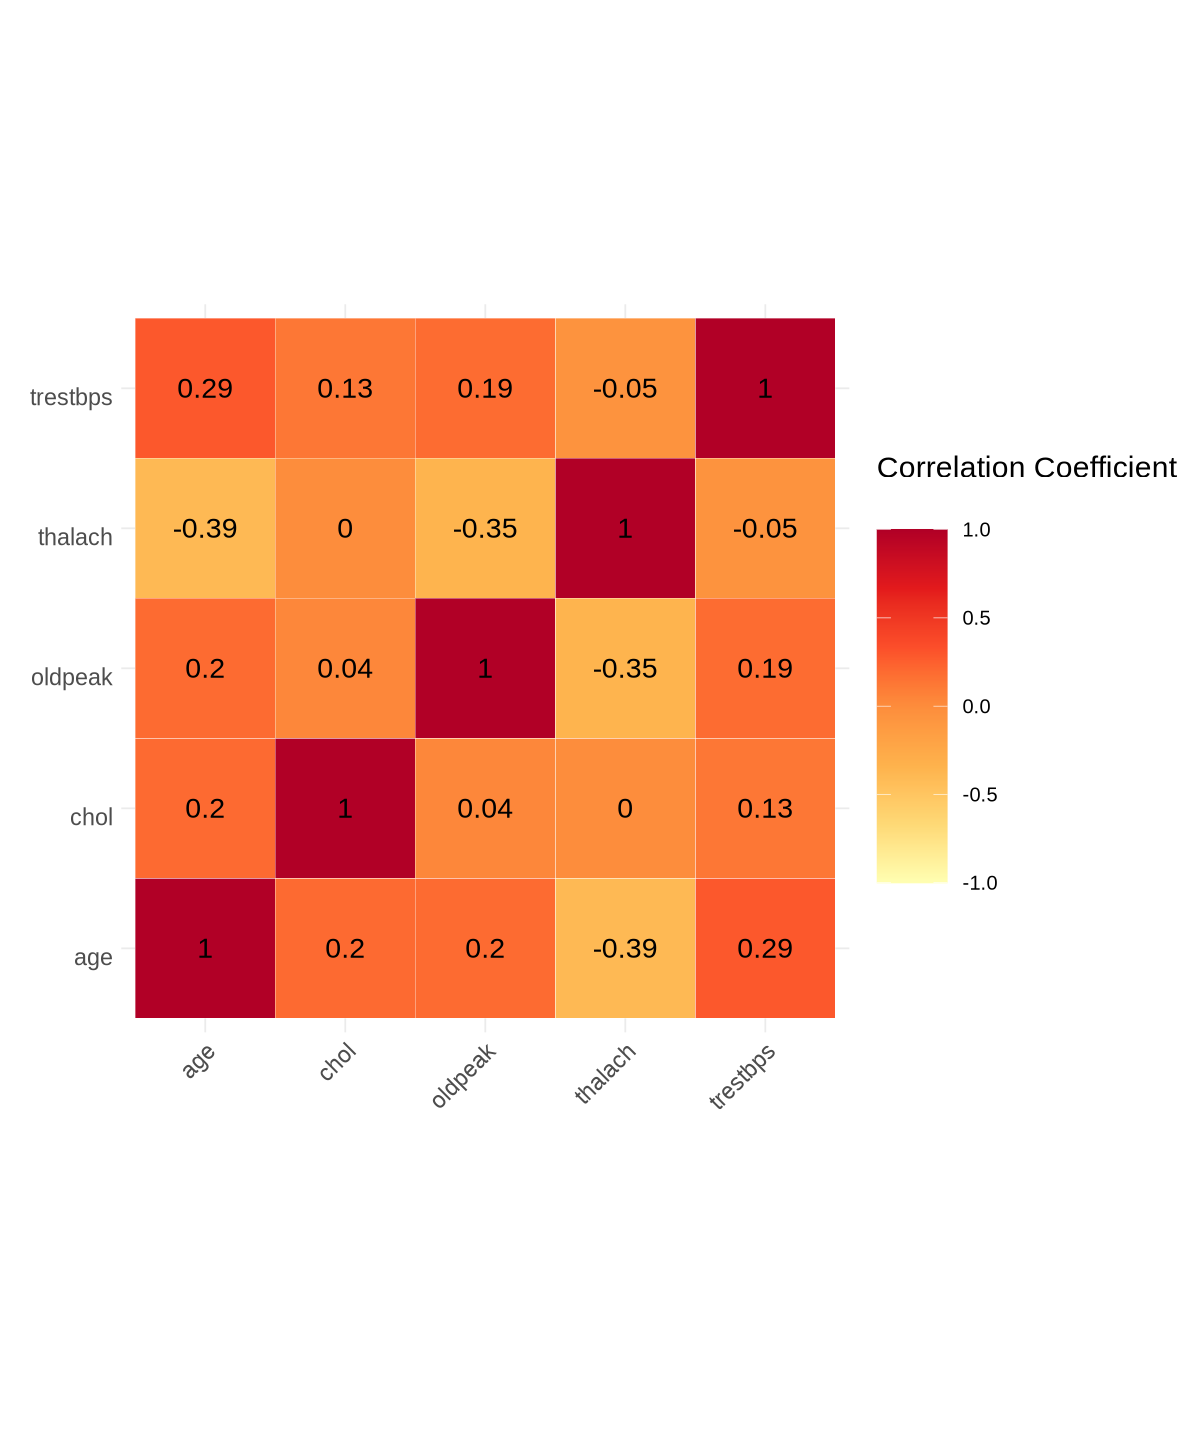

In [8]:
# Code written by Yang
options(repr.plot.width = 10, repr.plot.height = 12) 
plot_corr_matrix_heart_disease <- 
   corr_matrix_heart_disease %>%
   ggplot(aes(var1, var2)) +
   geom_tile(aes(fill = corr), color = "white") +
   scale_fill_distiller("Correlation Coefficient \n",
       palette =  "YlOrRd",
       direction = 1, 
       limits = c(-1,1)
     ) +
     labs(x = "", y = "") +
     theme_minimal() +
     theme(
         axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
         axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
         legend.title = element_text(size = 18),
         legend.text = element_text(size = 12),
         legend.key.size = unit(1.5, "cm")
     ) +
     coord_fixed() +
    geom_text(aes(var1, var2, label = round(corr, 2)), color = "black", size = 6)
plot_corr_matrix_heart_disease

*Figure 2*

##### Plot the distribution of the response variable to make sure there are no extreme imbalances

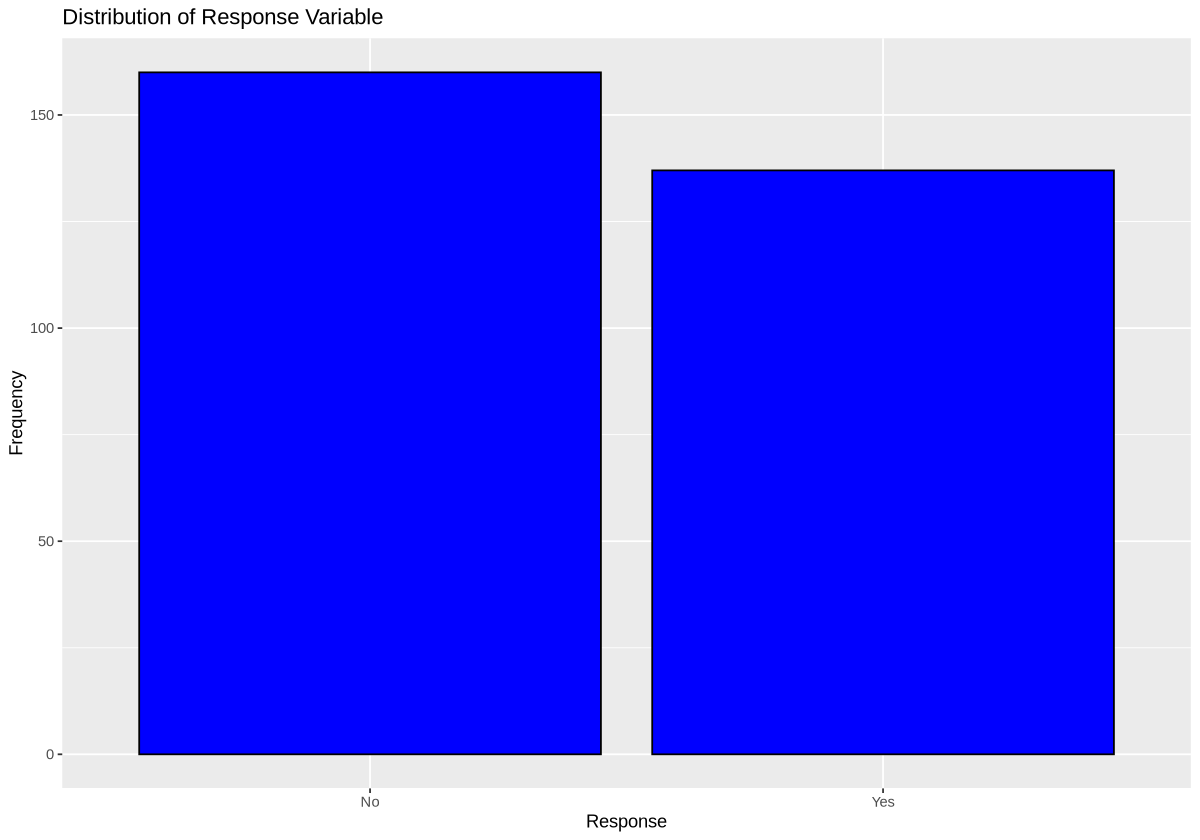

In [10]:
options(repr.plot.width = 10, repr.plot.height = 7) 
ggplot(heart_disease_data, aes(x = num)) +
geom_bar(fill = "blue", color = "black", stat = "count") +
labs(title = "Distribution of Response Variable", x = "Response (Has Heart Disease?)", y = "Frequency")

*Figure 3*

##### Histograms provide a sense of the distribution and range of numerical variables, highlighting potential outliers and the central tendency

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


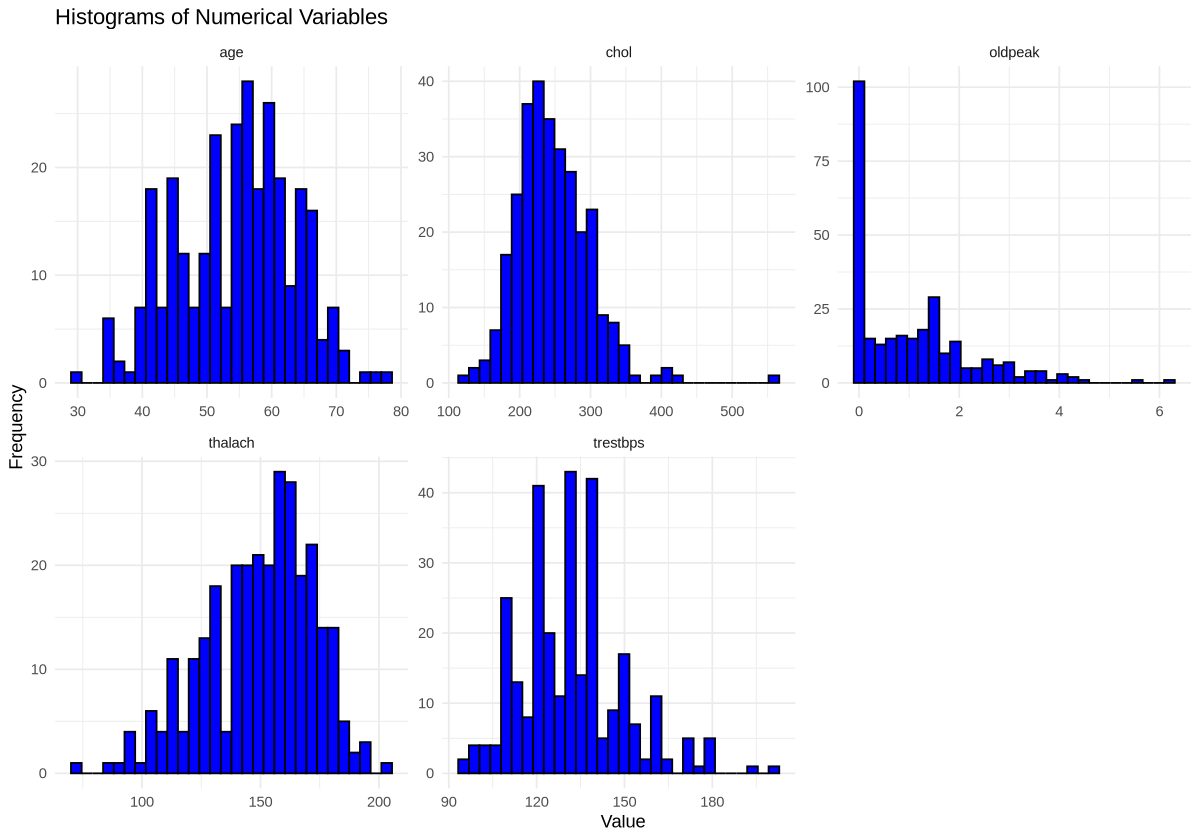

In [11]:
# Code written by Yang, edited by Jason
heart_disease_data %>%
  select(age, trestbps, chol, thalach, oldpeak) %>%
  gather(key = "Variable", value = "Value") %>%
  ggplot(aes(x = Value)) +
  geom_histogram(fill = "blue", color = "black") +
  facet_wrap(~ Variable, scales = "free") +
  theme_minimal() +
  labs(title = "Histograms of Numerical Variables", x = "Value", y = "Frequency")

*Figure 4*

##### Bar plots show the frequency distribution of categorical variables, helping to identify common categories and potential imbalances in the data.

Warning message:
“attributes are not identical across measure variables; they will be dropped”


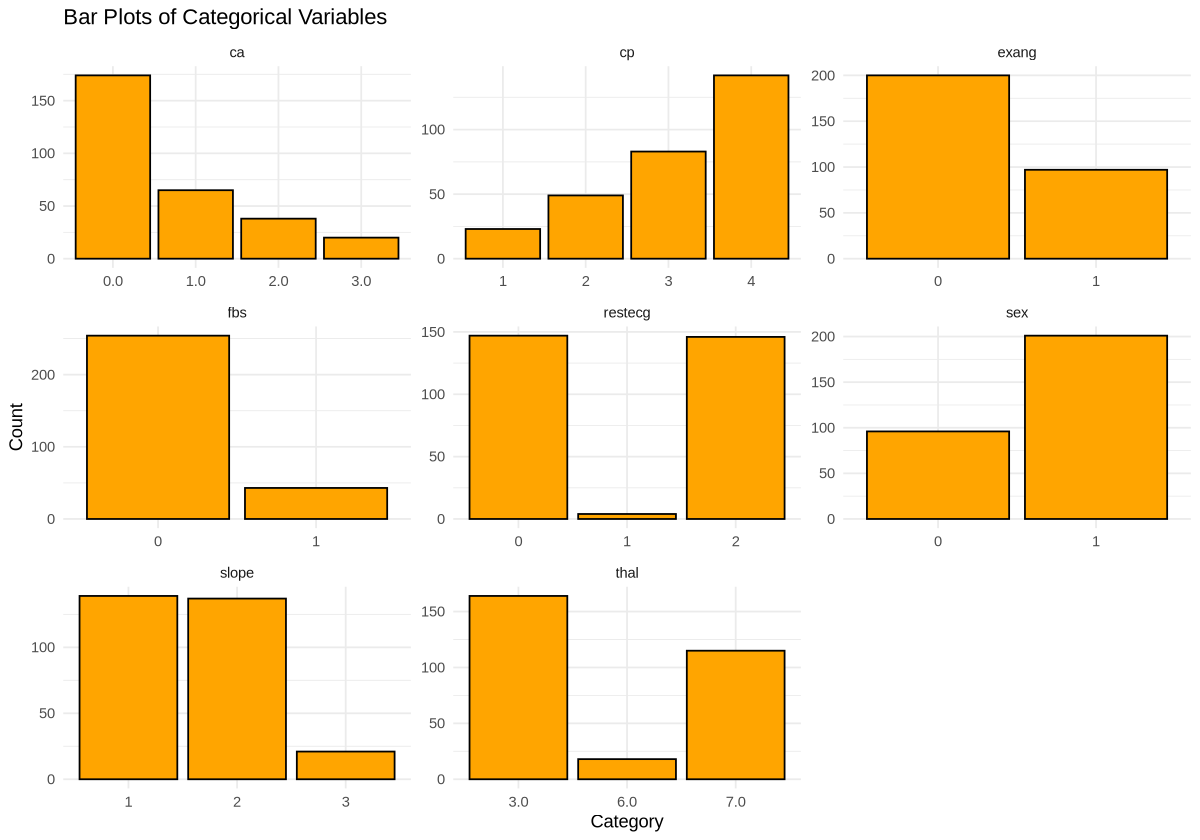

In [12]:
# Code written by Yang
heart_disease_data %>%
  select(sex, cp, fbs, restecg, exang, slope, ca, thal) %>%
  gather(key = "Variable", value = "Value") %>%
  ggplot(aes(x = as.factor(Value))) +
  geom_bar(fill = "orange", color = "black") +
  facet_wrap(~ Variable, scales = "free") +
  theme_minimal() +
  labs(title = "Bar Plots of Categorical Variables", x = "Category", y = "Count")

*Figure 5*

##### Box plots illustrate how the numerical variables differ between patients with and without heart disease, highlighting any significant differences.

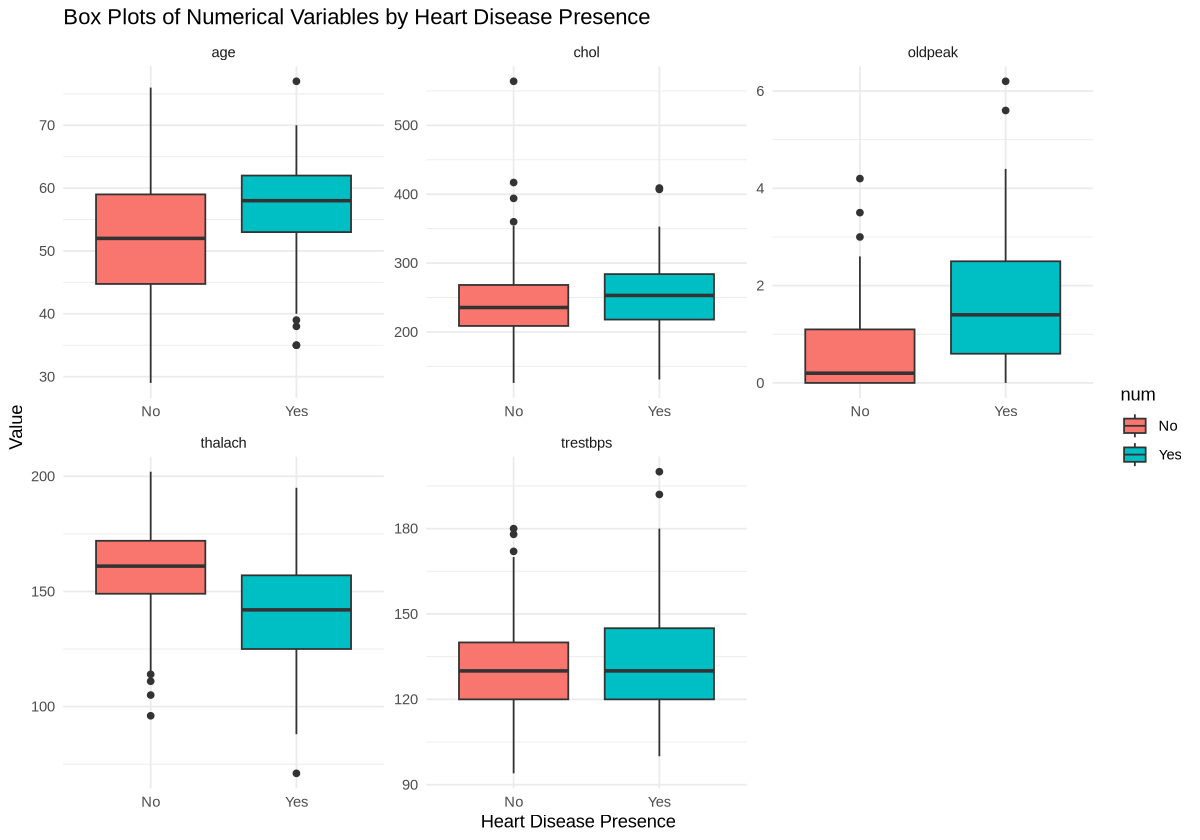

In [13]:
# Code written by Yang
heart_disease_data %>%
  select(age, trestbps, chol, thalach, oldpeak, num) %>%
  gather(key = "Variable", value = "Value", -num) %>%
  ggplot(aes(x = num, y = Value, fill = num)) +
  geom_boxplot() +
  facet_wrap(~ Variable, scales = "free") +
  theme_minimal() +
  labs(title = "Box Plots of Numerical Variables by Heart Disease Presence", x = "Heart Disease Presence", y = "Value")

*Figure 6*

### **2.b) Methods: Plan**

After loading and tidying the data, we first used `ggpairs`, the correlation matrix and the visualized heatmap (Figure 1, Table 4 and Figure 2 respectively) to help determine if there was any multicollinearity in our dataset. From Figure 2, we can see that the correlation coefficient between all covariates are relatively low, indicating that there is likely no multicollinearity in our dataset. <br>

The remaining plots (Figure 3 to Figure 6) are to help us better understand distributions of the data and maybe get a glimpse of patterns that could indicate heart disease. From Figure 3, we can see that we have a relatively equal amount of people with and without heart disease in the dataset. From Figure 6, we can see that the values of `age`, `oldpeak`, and `thalach` have a noticeable difference between patients without heart disease and patients with heart disease.

Since our target variable is either `Yes` or `No`, a logistic regression model would suit our question well. Because we established that our dataset has no multicollinearity, we can use all covariates in our model. We will be using a significance level of $\alpha$ = 0.05.

In [18]:
# Code written by Jason
heart_logistic_model <- glm(num ~ ., family = binomial, data = heart_disease_data)

# Checking the VIF to prove that there is no collinearity
vif(heart_logistic_model)

GVIF     Df GVIF^(1/(2*Df))
age      1.498066 1  1.223955       
sex      1.688578 1  1.299453       
cp       1.883027 3  1.111244       
trestbps 1.276534 1  1.129838       
chol     1.254640 1  1.120107       
fbs      1.170217 1  1.081766       
restecg  1.158806 2  1.037535       
thalach  1.528638 1  1.236381       
exang    1.169389 1  1.081383       
oldpeak  1.592022 1  1.261754       
slope    1.854245 2  1.166922       
ca       1.890243 3  1.111953       
thal     1.495956 2  1.105935

*Table 5*

From Table 5, we see that all GVIF values are much less than 5 or 10, proving that our data does not have multicollinearity.

In [20]:
# Code written by Jason
heart_logistic_results <- 
   tidy(heart_logistic_model, exponentiate = TRUE) %>% 
   mutate_if(is.numeric, round, 2)
heart_logistic_results

term        estimate std.error statistic p.value
1  (Intercept)  0.00    2.96      -2.11     0.03   
2  age          0.98    0.03      -0.94     0.35   
3  sex1         5.31    0.55       3.02     0.00   
4  cp2          4.26    0.81       1.79     0.07   
5  cp3          1.48    0.70       0.56     0.57   
6  cp4         10.73    0.71       3.35     0.00   
7  trestbps     1.03    0.01       2.36     0.02   
8  chol         1.00    0.00       1.09     0.28   
9  fbs1         0.56    0.59      -0.97     0.33   
10 restecg1     2.72    2.64       0.38     0.70   
11 restecg2     1.63    0.40       1.23     0.22   
12 thalach      0.98    0.01      -1.68     0.09   
13 exang1       1.92    0.45       1.46     0.14   
14 oldpeak      1.48    0.24       1.63     0.10   
15 slope2       3.68    0.49       2.68     0.01   
16 slope3       1.83    0.94       0.65     0.52   
17 ca1.0        9.37    0.51       4.35     0.00   
18 ca2.0       26.36    0.79       4.17     0.00   
19 ca3.0        8.92    0.93       2.36     0.02   
20 thal6.0      0.84    0.81      -0.21     0.84   
21 thal7.0      4.19    0.44       3.25     0.00

*Table 6*

From Table 6 and with our signifance level of $\alpha$ = 0.05, we can see that the following covariates are not statistically associated to the probability of heart disease: `age`, `chol`, `fbs`, `restecg`, `thalach`, `exang`, and `oldpeak`. <br>

We can also see that some categorical variables are statistically associated depending on the particular value. A `cp` value of either 2 or 3 is not statistically significant, but a value of 4 is. A `slope` value of 3 is not statistically significant but a value of 2 is. A `thal` value of 6.0 is not statistically significant but a value of 7.0 is.

From the remaining statistically significant covariates, we can get a sense of which conditions may be associated with heart disease. `ca` (the number of major vessels coloured by fluoroscopy) stands out. 1, 2, or 3 major vessels coloured is associated with an expected increase in the odds of having heart disease by a factor of 9.37, 26.36, and 8.92 respectively, while keeping all other variables constant. Another variable with a large increase in the odds of heart disease is asymptomatic chest pain (`cp4`), which is associated with an expected increase in the odds of having heart disease by a factor of 10.73, while keeping all other variables constant. <br>

There are also some variables with a moderate increase in the odds of heart disease, which include:
- Being male (`sex1`) is associated with an expected increase in the odds of having heart disease by a factor of 5.31, while keeping all other variables constant. 
- A thalassemia (`thal`) level of 7.0 is associated with an expected increase in the odds of having heart disease by a factor of 4.19, while keeping all other variables constant.
- A flat slope of the peak exercise ST segment (`slope2`) is associated with an expected increase in the odds of having heart disease by a factor of 3.68, while keeping all other variables constant. 

Lastly, an increasing in 1 mm Hg of resting blood pressure (`trestbps`) is associated with an expected increase in the odds of having heart disease by a factor of 1.03, while keeping all other variables constant. This has the smallest odds of all variables that are statistically significant.

## **(3) Discussion**

## **(4) References**